In [1]:
import numpy as np
import pandas as pd
import csv
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
import spacy
nlp = spacy.load('pt')


df = pd.read_csv('../dados_categorizados_completo_novo.csv')
df.head()

,Id,Enunciado,Tópico,Contexto
0,994,Meu primeiro programa\nEscreva um programa que...,Ambientação,Outros
1,996,Impressão de caracteres na tela\nEscreva um pr...,Ambientação,Outros
2,999,Impressão de caracteres na tela (Bart Simpson)...,Ambientação,Outros
3,1000,Operadores aritméticos\nQual o valor de X para...,Ambientação,Matemático
4,578,Operadores aritméticos \nQual o valor de Y par...,Ambientação,Matemático


In [3]:
df.shape

(1045, 4)

In [4]:
X = df['Enunciado']
y = df['Contexto']

In [5]:
from sklearn.model_selection import StratifiedKFold
vetor_X_train=[]
vetor_y_train=[]
vetor_X_test=[]
vetor_y_test=[]
split = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
for train_index, val_index in split.split(X, y):
    vetor_X_train+=[X.iloc[train_index]]
    vetor_X_test+=[X.iloc[val_index]]
    vetor_y_train+=[y[train_index]]
    vetor_y_test+=[y[val_index]]

/home/samuel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [6]:
def get_new_sentences(da,maximum,synonyms_lexicon):
    strings=[]
    for elemento in da['Enunciado']:
        if(len(da)+len(strings)<maximum):
            contador=0
            lista=elemento.split()
            while(contador<len(lista)):
                if(lista[contador] in synonyms_lexicon):
                    lista[contador]=synonyms_lexicon[lista[contador]][0]
                contador+=1
            strings+=[' '.join(lista)]
        else:
            break

    new_sentences = pd.Series(strings)
    return new_sentences

def get_synonyms_lexicon(path):
    synonyms_lexicon = {}
    text_entries = [l.strip() for l in open(path).readlines()]
    for e in text_entries:
        e = e.split(' ')
        k = e[0]
        v = e[1:len(e)]
        synonyms_lexicon[k] = v
    return synonyms_lexicon

synonyms_lexicon = get_synonyms_lexicon('../paráfrase/arq3.txt')

class LemmaTokenizer(object):
    def __call__(self, text):
        doc=nlp(text)
        tokens=[]
        for token in doc:
            if(token.text.isalpha() and len(token.text)>=2):
                tokens+=[token]
        return [t.lemma_ for t in tokens if t not in nlp.Defaults.stop_words]
pipeline= LinearSVC(
    penalty='l2',
    loss='squared_hinge',
    dual=True,
    tol=0.001,
    C=10.0,
    multi_class='ovr',
    fit_intercept=True,
    intercept_scaling=10,
    class_weight=None,
    verbose=0,
    random_state=None,
    max_iter=10000,
)
# pipeline=RandomForestClassifier()

# pipeline=MultinomialNB()

In [7]:
contador=0
predictions=[]
while(contador<len(vetor_X_train)):
    X_train=vetor_X_train[contador]
    y_train=vetor_y_train[contador]
    X_test=vetor_X_test[contador]
    y_test=vetor_y_test[contador]
    test = np.c_[X_train[:np.newaxis], y_train[:np.newaxis]]
    df = pd.DataFrame(test, columns=['Enunciado', 'Contexto'])
    
    maximum = df.Contexto.value_counts().max()
    g = df.groupby('Contexto')


    mat = g.get_group('Matemático')
    comercial = g.get_group('Comercial')
    jogos = g.get_group('Jogos')
    escolar = g.get_group('Escolar')
    outros = g.get_group('Outros')
    transito = g.get_group('Trânsito')
    esporte = g.get_group('Esporte')
    fisica = g.get_group('Física')
    bancario = g.get_group('Bancário')
    RH = g.get_group('RH')
    f_s = g.get_group('Filmes e séries')
    populacao = g.get_group('População')
    quimica = g.get_group('Química')
    pessoa = g.get_group('Pessoa')
    d_h = g.get_group('Data e hora')
    seguranca = g.get_group('Segurança')
    ambiente = g.get_group('Meio ambiente')
    pesquisa = g.get_group('Pesquisa')
    saude = g.get_group('Saúde')
    consumo = g.get_group('Consumo')
    geografia = g.get_group('Geografia')
    producao = g.get_group('Produção')
    imposto = g.get_group('Imposto')
    computacional = g.get_group('Computacional')
    
    new_jogos = get_new_sentences(jogos,maximum,synonyms_lexicon)
    new_comercial = get_new_sentences(comercial,maximum,synonyms_lexicon)
    new_escolar = get_new_sentences(escolar,maximum,synonyms_lexicon)
    new_outros = get_new_sentences(outros,maximum,synonyms_lexicon)
    new_transito = get_new_sentences(transito,maximum,synonyms_lexicon)
    new_esporte = get_new_sentences(esporte,maximum,synonyms_lexicon)
    new_fisica = get_new_sentences(fisica,maximum,synonyms_lexicon)
    new_bancario = get_new_sentences(bancario,maximum,synonyms_lexicon)
    new_RH = get_new_sentences(RH,maximum,synonyms_lexicon)
    new_f_s = get_new_sentences(f_s,maximum,synonyms_lexicon)
    new_populacao = get_new_sentences(populacao,maximum,synonyms_lexicon)
    new_quimica = get_new_sentences(quimica,maximum,synonyms_lexicon)
    new_pessoa = get_new_sentences(pessoa,maximum,synonyms_lexicon)
    new_d_h = get_new_sentences(d_h,maximum,synonyms_lexicon)
    new_seguranca = get_new_sentences(seguranca,maximum,synonyms_lexicon)
    new_pesquisa = get_new_sentences(pesquisa,maximum,synonyms_lexicon)
    new_ambiente = get_new_sentences(ambiente,maximum,synonyms_lexicon)
    new_saude = get_new_sentences(saude,maximum,synonyms_lexicon)
    new_consumo = get_new_sentences(consumo,maximum,synonyms_lexicon)
    new_geografia = get_new_sentences(geografia,maximum,synonyms_lexicon)
    new_producao = get_new_sentences(producao,maximum,synonyms_lexicon)
    new_computacional = get_new_sentences(computacional,maximum,synonyms_lexicon)
    new_imposto = get_new_sentences(imposto,maximum,synonyms_lexicon)

    
    new_jogos = pd.DataFrame(new_jogos,columns=['Enunciado'])
    new_jogos['Contexto'] = 'Jogos'

    new_comercial = pd.DataFrame(new_comercial,columns=['Enunciado'])
    new_comercial['Contexto'] = 'Comercial'

    new_escolar = pd.DataFrame(new_escolar,columns=['Enunciado'])
    new_escolar['Contexto'] = 'Escolar'

    new_outros = pd.DataFrame(new_outros,columns=['Enunciado'])
    new_outros['Contexto'] = 'Outros'

    new_transito = pd.DataFrame(new_transito,columns=['Enunciado'])
    new_transito['Contexto'] = 'Trânsito'

    new_esporte = pd.DataFrame(new_esporte,columns=['Enunciado'])
    new_esporte['Contexto'] = 'Esporte'

    new_fisica = pd.DataFrame(new_fisica,columns=['Enunciado'])
    new_fisica['Contexto'] = 'Física'

    new_bancario = pd.DataFrame(new_bancario,columns=['Enunciado'])
    new_bancario['Contexto'] = 'Bancário'

    new_RH = pd.DataFrame(new_RH,columns=['Enunciado'])
    new_RH['Contexto'] = 'RH'

    new_f_s = pd.DataFrame(new_f_s,columns=['Enunciado'])
    new_f_s['Contexto'] = 'Filmes e séries'

    new_populacao = pd.DataFrame(new_populacao,columns=['Enunciado'])
    new_populacao['Contexto'] = 'População'

    new_quimica = pd.DataFrame(new_quimica,columns=['Enunciado'])
    new_quimica['Contexto'] = 'Química'

    new_pessoa = pd.DataFrame(new_pessoa,columns=['Enunciado'])
    new_pessoa['Contexto'] = 'Pessoa'

    new_d_h = pd.DataFrame(new_d_h,columns=['Enunciado'])
    new_d_h['Contexto'] = 'Data e hora'

    new_seguranca = pd.DataFrame(new_seguranca,columns=['Enunciado'])
    new_seguranca['Contexto'] = 'Segurança'

    new_pesquisa = pd.DataFrame(new_pesquisa,columns=['Enunciado'])
    new_pesquisa['Contexto'] = 'Pesquisa'

    new_ambiente = pd.DataFrame(new_ambiente,columns=['Enunciado'])
    new_ambiente['Contexto'] = 'Meio ambiente'

    new_saude = pd.DataFrame(new_saude,columns=['Enunciado'])
    new_saude['Contexto'] = 'Saúde'

    new_consumo = pd.DataFrame(new_consumo,columns=['Enunciado'])
    new_consumo['Contexto'] = 'Consumo'

    new_geografia = pd.DataFrame(new_geografia,columns=['Enunciado'])
    new_geografia['Contexto'] = 'Geografia'

    new_producao = pd.DataFrame(new_producao,columns=['Enunciado'])
    new_producao['Contexto'] = 'Produção'

    new_computacional= pd.DataFrame(new_computacional,columns=['Enunciado'])
    new_computacional['Contexto'] = 'Computacional'

    new_imposto= pd.DataFrame(new_imposto,columns=['Enunciado'])
    new_imposto['Contexto'] = 'Imposto'
    
    jogos_extended = pd.concat([jogos, new_jogos], keys = ['Enunciado', 'Contexto'])
    comercial_extended = pd.concat([comercial, new_comercial], keys = ['Enunciado', 'Contexto'])
    escolar_extended = pd.concat([escolar, new_escolar], keys = ['Enunciado', 'Contexto'])
    outros_extended = pd.concat([outros, new_outros], keys = ['Enunciado', 'Contexto'])
    transito_extended = pd.concat([transito, new_transito], keys = ['Enunciado', 'Contexto'])
    esporte_extended = pd.concat([esporte, new_esporte], keys = ['Enunciado', 'Contexto'])
    fisica_extended = pd.concat([fisica, new_fisica], keys = ['Enunciado', 'Contexto'])
    bancario_extended = pd.concat([bancario, new_bancario], keys = ['Enunciado', 'Contexto'])
    RH_extended = pd.concat([RH, new_RH], keys = ['Enunciado', 'Contexto'])
    f_s_extended = pd.concat([f_s, new_f_s], keys = ['Enunciado', 'Contexto'])
    populacao_extended = pd.concat([populacao, new_populacao], keys = ['Enunciado', 'Contexto'])
    quimica_extended = pd.concat([quimica, new_quimica], keys = ['Enunciado', 'Contexto'])
    pessoa_extended = pd.concat([pessoa, new_pessoa], keys = ['Enunciado', 'Contexto'])
    d_h_extended = pd.concat([d_h, new_d_h], keys = ['Enunciado', 'Contexto'])
    seguranca_extended = pd.concat([seguranca, new_seguranca], keys = ['Enunciado', 'Contexto'])
    pesquisa_extended = pd.concat([pesquisa, new_pesquisa], keys = ['Enunciado', 'Contexto'])
    ambiente_extended = pd.concat([ambiente, new_ambiente], keys = ['Enunciado', 'Contexto'])
    saude_extended = pd.concat([saude, new_saude], keys = ['Enunciado', 'Contexto'])
    consumo_extended = pd.concat([consumo, new_consumo], keys = ['Enunciado', 'Contexto'])
    geografia_extended = pd.concat([geografia, new_geografia], keys = ['Enunciado', 'Contexto'])
    producao_extended = pd.concat([producao, new_producao], keys = ['Enunciado', 'Contexto'])
    computacional_extended = pd.concat([computacional, new_computacional], keys = ['Enunciado', 'Contexto'])
    imposto_extended = pd.concat([imposto, new_imposto], keys = ['Enunciado', 'Contexto'])
    
    df = pd.concat([mat, jogos_extended,comercial_extended,escolar_extended,outros_extended,
               transito_extended,esporte_extended,fisica_extended,bancario_extended,
               RH_extended,f_s_extended,populacao_extended,quimica_extended,
               pessoa_extended,d_h_extended,seguranca_extended,pesquisa_extended,
               ambiente_extended,saude_extended,consumo_extended,geografia_extended,
               producao_extended,computacional_extended,imposto_extended])
    
    X_train = df['Enunciado']
    y_train = df['Contexto']
    text_clf_lsvc2 = Pipeline([('tfidf', TfidfVectorizer(stop_words=nlp.Defaults.stop_words,
                            tokenizer=LemmaTokenizer(),sublinear_tf=True)),
                            ('svd', TruncatedSVD(algorithm='randomized', n_components=300)),
                            ('clf',pipeline),
    ])

    text_clf_lsvc2.fit(X_train, y_train)

    predictions+=[text_clf_lsvc2.predict(X_test)]

    contador+=1

/home/samuel/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['acercar', 'algum', 'antar', 'apoiar', 'baixar', 'caminhar', 'ceder', 'cincar', 'comer', 'conhecer', 'custar', 'dever', 'devir', 'direito', 'entrar', 'estevar', 'estivar', 'falto', 'formar', 'grupar', 'irar', 'ligar', 'mear', 'nado', 'nenhum', 'nó', 'o', 'obrigar', 'oitavar', 'orar', 'outro', 'parecer', 'parir', 'pelar', 'pontar', 'pôr', 'quantum', 'quartar', 'querer', 'quietar', 'quintar', 'segundar', 'seriar', 'sobrar', 'suar', 'tardar', 'terceirar', 'umar', 'vezar', 'vir', 'vário'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/home/samuel/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/samuel/anaconda3/lib/py

/home/samuel/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/samuel/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['acercar', 'algum', 'antar', 'apoiar', 'baixar', 'caminhar', 'ceder', 'cincar', 'comer', 'conhecer', 'custar', 'dever', 'devir', 'direito', 'entrar', 'estevar', 'estivar', 'falto', 'formar', 'grupar', 'irar', 'ligar', 'mear', 'nado', 'nenhum', 'nó', 'o', 'obrigar', 'oitavar', 'orar', 'outro', 'parecer', 'parir', 'pelar', 'pontar', 'pôr', 'quantum', 'quartar', 'querer', 'quietar', 'quintar', 'segundar', 'seriar', 'sobrar', 'suar', 'tardar', 'terceirar', 'umar', 'vezar', 'vir', 'vário'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/home/samuel/anaconda3/lib/py

In [8]:
y_pred=[]
for lista1 in predictions:
    for elemento1 in lista1:
        y_pred+=[elemento1]

In [9]:
y_test_sla=[]
for lista2 in vetor_y_test:
    for elemento2 in lista2:
        y_test_sla+=[elemento2]

In [10]:
print(metrics.confusion_matrix(y_test_sla,y_pred))

[[ 29   1   0   0   0   0   0   0   0   0   0   2   1   0   0   0   1   1
    0   0   0   0   0   0]
 [  2 108   0   0   1   1   0   1   0   0   0   2   1   0   1   0   0   0
    0   0   0   1   0   2]
 [  0   0   6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0  16   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0  18   0   0   0   0   0   0   0   1   0   0   0   0   0
    1   0   0   0   0   1]
 [  0   0   0   0   0  76   0   0   0   1   0   0   1   0   0   0   0   0
    0   0   0   0   0   1]
 [  0   0   0   0   0   0  42   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  29   0   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0  34   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   9   0   0   2   0   0   0   0   0
    0   0   0   0

In [11]:
print(metrics.classification_report(y_test_sla,y_pred))

                 precision    recall  f1-score   support

       Bancário       0.91      0.83      0.87        35
      Comercial       0.95      0.90      0.92       120
  Computacional       1.00      1.00      1.00         6
        Consumo       1.00      1.00      1.00        16
    Data e hora       0.82      0.86      0.84        21
        Escolar       0.94      0.96      0.95        79
        Esporte       1.00      1.00      1.00        42
Filmes e séries       0.94      0.97      0.95        30
         Física       0.92      0.94      0.93        36
      Geografia       0.75      0.82      0.78        11
        Imposto       0.80      0.80      0.80         5
          Jogos       0.94      0.94      0.94        96
     Matemático       0.94      0.98      0.96       261
  Meio ambiente       1.00      0.89      0.94        18
         Outros       0.91      0.85      0.88        59
       Pesquisa       1.00      1.00      1.00        18
         Pessoa       0.91    

In [12]:
print(metrics.accuracy_score(y_test_sla,y_pred))

0.9358851674641149


In [13]:
mat_etc = confusion_matrix(y_test_sla, y_pred)
row_sums = mat_etc.sum(axis=1, keepdims=True)


In [14]:
norm_conf_mx = mat_etc / row_sums

In [15]:
labels = ['Bancário','Comercial','Computacional','Consumo','Data e hora','Escolar','Esportes',
         'Filmes e séries','Física','Geogragia','Imposto','Jogos','Matemático',
          'Meio ambiente','Outros','Pesquisa','Pessoa','População','Produção',
         'Química','RH','Saúde','Segurança','Trânsito']

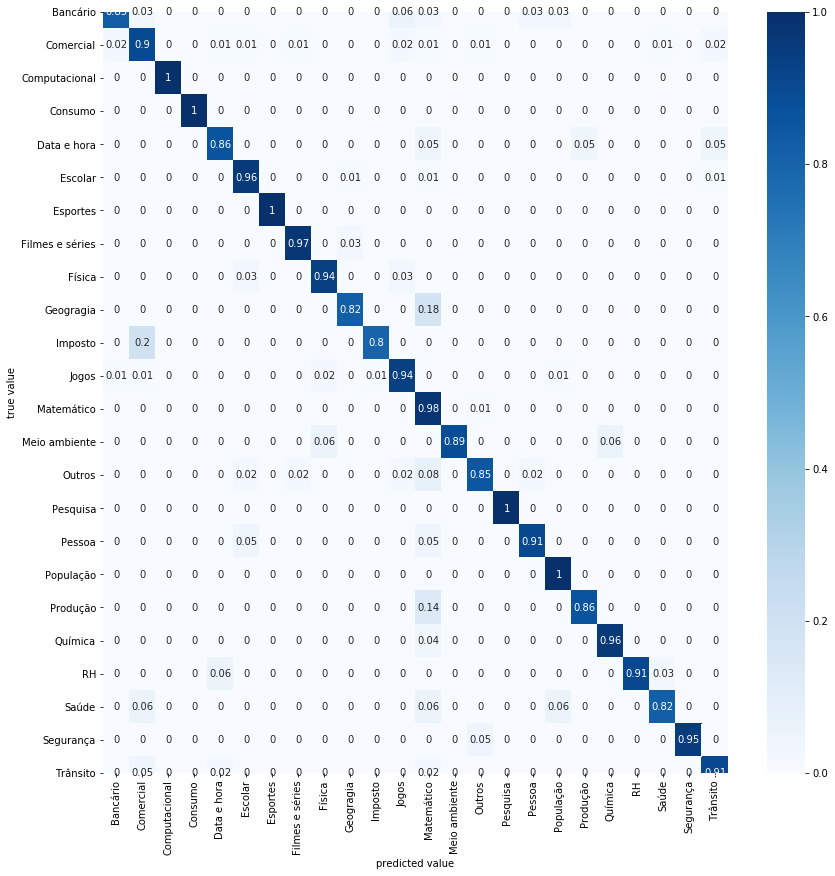

In [16]:
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(pd.DataFrame(norm_conf_mx.round(2),
                         columns=labels, 
                         index=labels), 
            annot=True, 
            fmt='g', 
            cmap='Blues')
plt.xlabel('predicted value')
plt.ylabel('true value');